<a href="https://colab.research.google.com/github/Lance-Gamier/Particle-Physics-Codes/blob/main/CERN_PyROOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Package First. Run only once, no need to Rerun.

In [ ]:
# In Google Colab
!pip install -q condacolab
import condacolab
condacolab.install()

# Restart kernel after this cell, then continue:

✨🍰✨ Everything looks OK!


In [ ]:
!pip install uproot

In [ ]:
!pip install awkward-pandas

# Sample Histograms

In [ ]:
# After kernel restart
!conda install -c conda-forge root -y

# Now test PyROOT
import ROOT
h = ROOT.TH1F("h", "test histogram", 100, -4, 4)
h.FillRandom("gaus", 1000)
c = ROOT.TCanvas()
h.Draw()
c.Draw()

Channels:
 - conda-forge
Platform: linux-64
Solving environment: | / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - root


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _x86_64-microarch-level-3  |      2_broadwell           8 KB  conda-forge
    adwaita-icon-theme-48.0    |           unix_0         596 KB  conda-forge
    anyio-4.9.0                |     pyh29332c3_0         123 KB  conda-forge
    argon2-cffi-23.1.0         |     pyhd8ed1ab_1          18 KB  conda-forge
    argon2-cffi-bindings-21.2.0|  py311h9ecbd09_5          34 KB  conda-forge
    arrow-1.3.0                |     pyhd8ed1ab_1          98 KB  conda-forge
    asttokens-3.0.0            |     pyhd8ed1ab_1          28 KB  conda-forge
    async-lru-2.0.5            |     pyh29332c3_0          17 KB  conda-forge
    at-spi2-atk-2.38.0     

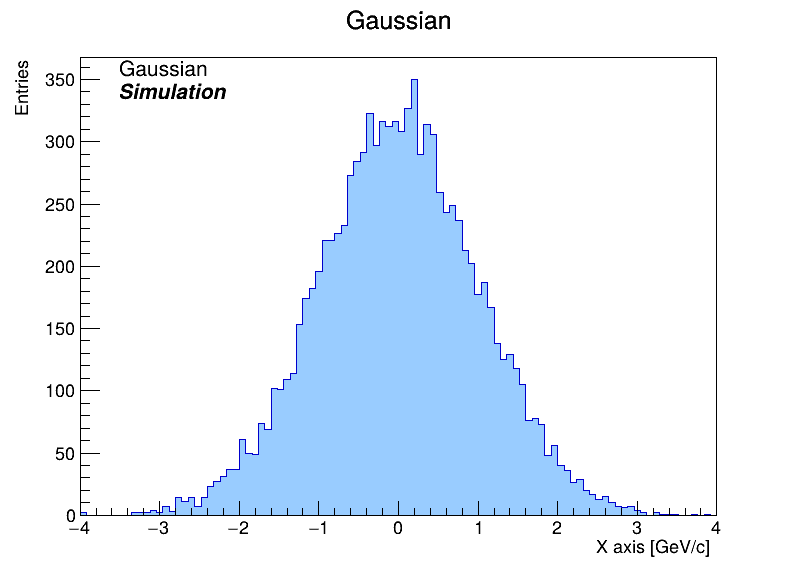

Info in <TCanvas::Print>: png file plot.png has been created


In [ ]:
import ROOT
from IPython.display import Image, display

# Create a histogram and fill it
h0 = ROOT.TH1F("h0", "Gaussian;X axis [GeV/c];Entries", 100, -4, 4)
h0.FillRandom("gaus", 10000)

# Set LaTeX style
ROOT.gStyle.SetOptStat(0)
h0.SetLineColor(ROOT.kBlue+1)
h0.SetFillColor(ROOT.kAzure-9)

# Add a text label
latex = ROOT.TLatex()
latex.SetNDC()
latex.SetTextSize(0.04)

# Create a canvas
c0 = ROOT.TCanvas("c", "canvas", 800, 600)
h0.Draw("HIST")
latex.DrawLatex(0.15, 0.85, "#splitline{#bf{Gaussian}}{#it{Simulation}}")

# Save and display as PNG
c0.SaveAs("plot.png")
display(Image(filename="plot.png"))

# Sample Data from CERN OpenData

In [ ]:
import uproot

test_directory = "https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/1largeRjet1lep/MC/"
test_item = "mc_361106.Zee.1largeRjet1lep.root"

test_file = uproot.open(test_directory + test_item)
print(  test_file.keys()  )

In [ ]:
import pandas as pd

test_file["mini"].arrays(library = "pd")

,runNumber,eventNumber,channelNumber,mcWeight,scaleFactor_PILEUP,scaleFactor_ELE,scaleFactor_MUON,scaleFactor_PHOTON,scaleFactor_TAU,scaleFactor_BTAG,...,largeRjet_pt,largeRjet_eta,largeRjet_phi,largeRjet_E,largeRjet_m,largeRjet_truthMatched,largeRjet_D2,largeRjet_tau32,largeRjet_pt_syst,tau_charge
0,284500,15440,361106,1940.819946,1.264594,0.941115,1.0,1.0,1.0,0.999384,...,"[336389.21875, 326111.625]","[-1.6073603630065918, 0.3427349328994751]","[-3.119643211364746, -0.05282483994960785]","[878163.0, 352508.03125]","[95666.125, 70169.3828125]","[0.0, 0.0]","[0.06860469281673431, 1.7374916076660156]","[0.5651314854621887, 0.6696122288703918]","[17716.03125, 4227.15625]",[]
1,284500,81085,361106,1941.910034,1.320948,0.992704,1.0,1.0,1.0,0.997777,...,"[424948.15625, 295925.375, 288773.5625]","[-0.5010395646095276, 0.0035355701111257076, 0...","[0.3973884582519531, 3.0375211238861084, -2.17...","[494285.71875, 314167.0625, 393288.84375]","[120339.1484375, 105489.4140625, 75616.8828125]","[0.0, 0.0, 0.0]","[1.4906837940216064, 0.14045220613479614, 0.62...","[0.6430507302284241, 0.19809924066066742, 0.69...","[22269.96875, 14174.65625, 24763.46875]",[]
2,284500,89512,361106,1940.760010,1.251332,0.993904,1.0,1.0,1.0,0.999102,...,[255974.59375],[1.6731088161468506],[0.8049546480178833],[706647.8125],[29652.1796875],[0.0],[3.0340845584869385],[0.8060808181762695],[0.0],[]
3,284500,92009,361106,1941.709961,1.320948,0.957973,1.0,1.0,1.0,1.000000,...,[357909.625],[-0.23516122996807098],[-2.2556815147399902],[377280.15625],[83818.125],[1.0],[0.13190588355064392],[0.18124952912330627],[1438.09375],[]
4,284500,102088,361106,1941.239990,1.320948,0.948454,1.0,1.0,1.0,0.997393,...,"[339715.34375, 337192.75]","[0.22991251945495605, -1.123876929283142]","[-1.279531717300415, 1.6654552221298218]","[362021.65625, 574320.125]","[97183.0703125, 30168.134765625]","[0.0, 0.0]","[0.042992595583200455, 2.0432703495025635]","[0.07514524459838867, 0.7163976430892944]","[13062.9375, 5456.125]",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53648,284500,5740044,361106,1941.760010,0.934886,0.986970,1.0,1.0,1.0,0.999438,...,"[272509.03125, 264178.5]","[-0.1149594634771347, -0.8801232576370239]","[-2.6213316917419434, 0.5289878249168396]","[274337.5625, 373833.25]","[3766.634765625, 20426.28515625]","[0.0, 0.0]","[0.0, 2.0461883544921875]","[-1.0, 0.7430232167243958]","[17955.4375, 0.0]",[]
53649,284500,5752321,361106,1941.680054,0.596562,0.889910,1.0,1.0,1.0,0.999002,...,[272032.4375],[1.6677606105804443],[-2.4962265491485596],[746732.9375],[14772.88671875],[0.0],[3.9027459621429443],[0.5808534622192383],[21161.609375],[]
53650,284500,5757742,361106,1941.000000,1.251332,0.984580,1.0,1.0,1.0,0.998199,...,[262801.75],[-0.2552032172679901],[-1.0126088857650757],[280588.09375],[71192.078125],[0.0],[0.03648453578352928],[0.39032232761383057],[7288.890625],[]
53651,284500,5745755,361106,1940.719971,1.196105,0.964722,1.0,1.0,1.0,0.999469,...,"[266810.53125, 260362.53125]","[-0.47211164236068726, 0.4879254996776581]","[-1.3692597150802612, 1.774723768234253]","[298000.40625, 312144.3125]","[23127.982421875, 110384.9375]","[0.0, 0.0]","[1.6352672576904297, 0.008855442516505718]","[0.6556219458580017, -1.0]","[1491.40625, 8128.96875]",[]


# Test on various datasets inside the same directory

### Directory: https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/GamGam/MC/

In [ ]:
import uproot

directory = "https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/GamGam/MC/"

item_1 = "mc_341081.ttH125_gamgam.GamGam.root"
item_2 = "mc_343981.ggH125_gamgam.GamGam.root"
item_3 = "mc_345041.VBFH125_gamgam.GamGam.root"
item_4 = "mc_345318.WpH125J_Wincl_gamgam.GamGam.root"
item_5 = "mc_345319.ZH125J_Zincl_gamgam.GamGam.root"

file_1 = uproot.open(directory + item_1)
file_2 = uproot.open(directory + item_2)
file_3 = uproot.open(directory + item_3)
file_4 = uproot.open(directory + item_4)
file_5 = uproot.open(directory + item_5)

In [ ]:
print(  file_1.keys()  )
print(  file_2.keys()  )
print(  file_3.keys()  )
print(  file_4.keys()  )
print(  file_5.keys()  )

['mini;1']
['mini;1']
['mini;1']
['mini;1']
['mini;1']


In [ ]:
import pandas as pd

file_1["mini"].arrays(library = "pd")

,runNumber,eventNumber,channelNumber,mcWeight,scaleFactor_PILEUP,scaleFactor_ELE,scaleFactor_MUON,scaleFactor_PHOTON,scaleFactor_TAU,scaleFactor_BTAG,...,largeRjet_pt,largeRjet_eta,largeRjet_phi,largeRjet_E,largeRjet_m,largeRjet_truthMatched,largeRjet_D2,largeRjet_tau32,largeRjet_pt_syst,tau_charge
0,284500,674070,341081,-1.0,0.696077,1.00000,0.995968,1.005772,1.0,1.076109,...,[],[],[],[],[],[],[],[],[],[]
1,284500,674033,341081,-1.0,0.696077,1.00000,0.995324,1.001342,1.0,0.934331,...,[],[],[],[],[],[],[],[],[],[]
2,284500,674129,341081,-1.0,0.696077,1.00000,1.000000,1.007652,1.0,1.066152,...,[],[],[],[],[],[],[],[],[],[]
3,284500,674306,341081,1.0,0.750880,0.94772,1.000000,1.014442,1.0,0.933773,...,[],[],[],[],[],[],[],[],[],[]
4,284500,674312,341081,1.0,0.750880,1.00000,0.999456,1.018067,1.0,0.995078,...,[],[],[],[],[],[],[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576486,284500,47914,341081,1.0,0.750880,1.00000,1.000000,1.003022,1.0,1.036802,...,[],[],[],[],[],[],[],[],[],[]
576487,284500,47838,341081,1.0,0.750880,1.00000,1.000000,1.004813,1.0,0.948241,...,[],[],[],[],[],[],[],[],[],[]
576488,284500,47913,341081,1.0,0.696077,1.00000,1.000000,1.026095,1.0,1.023153,...,[],[],[],[],[],[],[],[],[],[]
576489,284500,48125,341081,1.0,0.696077,0.96654,1.000000,0.969290,1.0,1.078966,...,[],[],[],[],[],[],[],[],[],[]


In [ ]:
import pandas as pd

file_2["mini"].arrays(library = "pd")

,runNumber,eventNumber,channelNumber,mcWeight,scaleFactor_PILEUP,scaleFactor_ELE,scaleFactor_MUON,scaleFactor_PHOTON,scaleFactor_TAU,scaleFactor_BTAG,...,largeRjet_pt,largeRjet_eta,largeRjet_phi,largeRjet_E,largeRjet_m,largeRjet_truthMatched,largeRjet_D2,largeRjet_tau32,largeRjet_pt_syst,tau_charge
0,284500,3000780,343981,28.485731,0.000000,1.00000,1.0,1.005131,1.0,0.999523,...,[],[],[],[],[],[],[],[],[],[]
1,284500,3000613,343981,28.485731,0.351687,1.00000,1.0,0.970159,1.0,0.997608,...,[],[],[],[],[],[],[],[],[],[]
2,284500,3000197,343981,28.485731,0.553627,1.00000,1.0,0.988219,1.0,0.998555,...,[],[],[],[],[],[],[],[],[],[]
3,284500,3000378,343981,28.485731,0.619412,1.00000,1.0,0.986910,1.0,1.000000,...,[],[],[],[],[],[],[],[],[],[]
4,284500,3000987,343981,28.485731,0.619412,1.00000,1.0,1.004187,1.0,0.994923,...,[],[],[],[],[],[],[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054706,284500,4822949,343981,28.485731,1.251332,1.00000,1.0,0.990247,1.0,1.000000,...,[],[],[],[],[],[],[],[],[],[]
1054707,284500,4822549,343981,28.485731,1.214122,1.00000,1.0,0.998569,1.0,1.000000,...,[],[],[],[],[],[],[],[],[],[]
1054708,284500,4822745,343981,28.485731,1.320948,1.00000,1.0,0.992051,1.0,0.998649,...,[],[],[],[],[],[],[],[],[],[]
1054709,284500,4822300,343981,28.485731,1.320948,1.09758,1.0,1.005967,1.0,1.000000,...,[],[],[],[],[],[],[],[],[],[]


In [ ]:
import pandas as pd

file_3["mini"].arrays(library = "pd")

,runNumber,eventNumber,channelNumber,mcWeight,scaleFactor_PILEUP,scaleFactor_ELE,scaleFactor_MUON,scaleFactor_PHOTON,scaleFactor_TAU,scaleFactor_BTAG,...,largeRjet_pt,largeRjet_eta,largeRjet_phi,largeRjet_E,largeRjet_m,largeRjet_truthMatched,largeRjet_D2,largeRjet_tau32,largeRjet_pt_syst,tau_charge
0,284500,1404,345041,3.749917,0.000000,1.0,1.0,0.996102,1.0,1.000000,...,[],[],[],[],[],[],[],[],[],[]
1,284500,1902,345041,3.749917,0.002927,1.0,1.0,0.997266,1.0,0.983098,...,[],[],[],[],[],[],[],[],[],[]
2,284500,1530,345041,3.749917,0.351687,1.0,1.0,0.997266,1.0,0.999814,...,[],[],[],[],[],[],[],[],[],[]
3,284500,1578,345041,3.749917,0.553627,1.0,1.0,0.990473,1.0,0.997439,...,[],[],[],[],[],[],[],[],[],[]
4,284500,1254,345041,3.749917,0.619412,1.0,1.0,1.005007,1.0,0.996975,...,[],[],[],[],[],[],[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497463,284500,828390,345041,3.749917,1.745631,1.0,1.0,0.993275,1.0,0.990255,...,[],[],[],[],[],[],[],[],[],[]
497464,284500,828257,345041,3.749917,0.596562,1.0,1.0,0.995918,1.0,0.999808,...,[],[],[],[],[],[],[],[],[],[]
497465,284500,828771,345041,3.749917,0.934886,1.0,1.0,1.010140,1.0,0.998334,...,[],[],[],[],[],[],[],[],[],[]
497466,284500,828545,345041,3.749917,1.087349,1.0,1.0,1.002508,1.0,1.000000,...,[],[],[],[],[],[],[],[],[],[]


In [ ]:
import pandas as pd

file_4["mini"].arrays(library = "pd")

,runNumber,eventNumber,channelNumber,mcWeight,scaleFactor_PILEUP,scaleFactor_ELE,scaleFactor_MUON,scaleFactor_PHOTON,scaleFactor_TAU,scaleFactor_BTAG,...,largeRjet_pt,largeRjet_eta,largeRjet_phi,largeRjet_E,largeRjet_m,largeRjet_truthMatched,largeRjet_D2,largeRjet_tau32,largeRjet_pt_syst,tau_charge
0,284500,362,345318,0.876891,0.000000,1.00000,1.000000,1.021670,1.0,1.000000,...,[],[],[],[],[],[],[],[],[],[]
1,284500,798,345318,0.876891,0.000000,1.00000,1.000000,0.986910,1.0,0.998636,...,[],[],[],[],[],[],[],[],[],[]
2,284500,232,345318,0.876891,0.187531,0.95698,1.000000,1.002100,1.0,1.000000,...,[],[],[],[],[],[],[],[],[],[]
3,284500,176,345318,0.876891,0.553627,0.94914,1.000000,1.005007,1.0,1.000000,...,[],[],[],[],[],[],[],[],[],[]
4,284500,338,345318,0.876891,0.553627,1.00000,1.000000,0.988993,1.0,0.998594,...,[],[],[],[],[],[],[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113760,284500,74728,345318,0.876891,0.923924,1.00000,1.000000,0.998332,1.0,0.999367,...,[],[],[],[],[],[],[],[],[],[]
113761,284500,74682,345318,0.876891,0.750880,0.97332,1.000000,1.003818,1.0,1.000000,...,[],[],[],[],[],[],[],[],[],[]
113762,284500,74285,345318,0.876891,0.750880,1.00000,0.994954,0.986421,1.0,0.999444,...,[],[],[],[],[],[],[],[],[],[]
113763,284500,74578,345318,0.876891,0.696077,1.00000,1.000000,0.995559,1.0,0.996337,...,[],[],[],[],[],[],[],[],[],[]


In [ ]:
import pandas as pd

file_5["mini"].arrays(library = "pd")

,runNumber,eventNumber,channelNumber,mcWeight,scaleFactor_PILEUP,scaleFactor_ELE,scaleFactor_MUON,scaleFactor_PHOTON,scaleFactor_TAU,scaleFactor_BTAG,...,largeRjet_pt,largeRjet_eta,largeRjet_phi,largeRjet_E,largeRjet_m,largeRjet_truthMatched,largeRjet_D2,largeRjet_tau32,largeRjet_pt_syst,tau_charge
0,284500,212605,345319,0.776005,1.241677,0.949495,1.0,0.992180,1.0,1.000000,...,[],[],[],[],[],[],[],[],[],[]
1,284500,212615,345319,0.776005,1.241677,1.000000,1.0,0.982953,1.0,0.970136,...,[],[],[],[],[],[],[],[],[],[]
2,284500,212625,345319,0.776005,1.241677,1.000000,1.0,0.985312,1.0,0.999946,...,[],[],[],[],[],[],[],[],[],[]
3,284500,212636,345319,0.776005,1.241677,1.000000,1.0,0.997632,1.0,1.013104,...,[],[],[],[],[],[],[],[],[],[]
4,284500,212653,345319,0.776005,1.241677,0.942720,1.0,1.003451,1.0,0.999546,...,[],[],[],[],[],[],[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230895,284500,228826,345319,0.776005,0.696077,1.000000,1.0,0.993153,1.0,0.998745,...,[],[],[],[],[],[],[],[],[],[]
230896,284500,228873,345319,0.776005,1.262048,1.000000,1.0,1.004952,1.0,0.996270,...,[],[],[],[],[],[],[],[],[],[]
230897,284500,228915,345319,0.776005,1.262048,1.000000,1.0,1.008561,1.0,1.000000,...,[],[],[],[],[],[],[],[],[],[]
230898,284500,228985,345319,0.776005,1.262048,1.000000,1.0,0.995918,1.0,0.998783,...,[],[],[],[],[],[],[],[],[],[]
